In [100]:
import pandas as pd
import numpy as np
import tweepy
import emoji
from textblob import TextBlob
from wordcloud import WordCloud
import re
import matplotlib.pyplot as plt

In [ ]:
#pip install emoji

In [ ]:
#twitter api login

In [54]:
#first 500 tweets of WHO
tweets = api.user_timeline(screen_name="WHO",count=500,lang ="en",tweet_mode="extended")

for i in range(5):
  print(tweets[i].full_text)

RT @DrTedros: Interconnectedness is a strength, but also a weakness when it comes to the spread of disease. @WHO's ACT-Accelerator brings c…
RT @DrTedros: I offered my profound condolences to #Italy as a nation &amp; to each family that has lost a loved one due to #COVID19; &amp; my deep…
RT @DrTedros: #Italy is a shining example that with national unity, solidarity, humility &amp; community engagement, even the most severe situa…
RT @DrTedros: Congratulations and I extend a warm welcome to the 2020 class of #SDGYoungLeaders, 17 young change-makers helping us deliver…
RT @DrTedros: Honoured to speak at the Courtyard of Assisi about the way forward from #COVID19: unity &amp; solidarity.
The forces of nationali…


In [92]:
tweets_list = []
for i in range(len(tweets)):
  tweets_list.append(tweets[i].full_text)

In [93]:
tweets_list

["RT @DrTedros: Interconnectedness is a strength, but also a weakness when it comes to the spread of disease. @WHO's ACT-Accelerator brings c…",
 'RT @DrTedros: I offered my profound condolences to #Italy as a nation &amp; to each family that has lost a loved one due to #COVID19; &amp; my deep…',
 'RT @DrTedros: #Italy is a shining example that with national unity, solidarity, humility &amp; community engagement, even the most severe situa…',
 'RT @DrTedros: Congratulations and I extend a warm welcome to the 2020 class of #SDGYoungLeaders, 17 young change-makers helping us deliver…',
 'RT @DrTedros: Honoured to speak at the Courtyard of Assisi about the way forward from #COVID19: unity &amp; solidarity.\nThe forces of nationali…',
 'RT @DrTedros: Indeed, the prayer of St. Francis has never been more relevant, for people of all faiths and none.\nWhere there is hatred, we…',
 'Recognizing the importance and impact of #infertility on people’s quality of life &amp; well-being, WHO is worki

In [114]:
#preprocessing tweets
#removing unwanted symbols, emojis and links

tweets_cleaned = []
for i in range(len(tweets_list)):
  temp = re.sub('@[A-Za-z0–9]+', '', tweets_list[i]) 
  temp = re.sub('#', '', temp) 
  temp = re.sub("!","",temp)
  temp = re.sub('http[s]?://\S+', '', temp)
  temp = re.sub(":","",temp)
  temp = re.sub(";","",temp)
  temp = re.sub("\n","",temp)
  temp = re.sub(",","",temp)
  temp = re.sub('RT[\s]+', '', temp) 
  temp = re.sub(emoji.get_emoji_regexp(), "", temp)
  tweets_cleaned.append(temp)

In [115]:
tweets_cleaned

["Interconnectedness is a strength but also a weakness when it comes to the spread of disease. 's ACT-Accelerator brings c…",
 'I offered my profound condolences to Italy as a nation &amp to each family that has lost a loved one due to COVID19 &amp my deep…',
 'Italy is a shining example that with national unity solidarity humility &amp community engagement even the most severe situa…',
 'Congratulations and I extend a warm welcome to the 2020 class of SDGYoungLeaders 17 young change-makers helping us deliver…',
 'Honoured to speak at the Courtyard of Assisi about the way forward from COVID19 unity &amp solidarity.The forces of nationali…',
 'Indeed the prayer of St. Francis has never been more relevant for people of all faiths and none.Where there is hatred we…',
 'Recognizing the importance and impact of infertility on people’s quality of life &amp well-being WHO is working with countries &amp partners around  to address infertility and fertility care.WHO response in detail  ',
 'Add

In [128]:
#sentiment analysis with textblob

tweets_cleaned_df = pd.DataFrame(tweets_cleaned, columns=["tweets"])
tweets_cleaned_df["Polarity"] = tweets_cleaned_df["tweets"].apply(lambda x: TextBlob(x).sentiment.polarity)
tweets_cleaned_df["Subjectivity"] = tweets_cleaned_df["tweets"].apply(lambda x: TextBlob(x).sentiment.subjectivity)

In [129]:
tweets_cleaned_df

,tweets,Polarity,Subjectivity
0,Interconnectedness is a strength but also a we...,0.000000,0.000000
1,I offered my profound condolences to Italy as ...,0.219444,0.725000
2,Italy is a shining example that with national ...,0.500000,0.500000
3,Congratulations and I extend a warm welcome to...,0.500000,0.633333
4,Honoured to speak at the Courtyard of Assisi a...,0.000000,0.000000
...,...,...,...
195,WHO &amp partners have agreed and developed a...,0.300000,0.400000
196,Equitable global access to tests treatments an...,0.266667,0.633333
197,Vaccine nationalism= When a few countries secu...,0.228571,0.407143
198,COVID19 vaccines should be made available firs...,0.017063,0.487302


In [152]:
# analyse the sentiment with polarity
sentiment = []
for i in tweets_cleaned_df["Polarity"]:
  if i < 0:
    sentiment.append("Negative")
  elif i == 0:
    sentiment.append("Neutral")
  else:
    sentiment.append("Positive")

tweets_cleaned_df["Sentiment"] = sentiment

In [153]:
tweets_cleaned_df

,tweets,Polarity,Subjectivity,Sentiment
0,Interconnectedness is a strength but also a we...,0.000000,0.000000,Neutral
1,I offered my profound condolences to Italy as ...,0.219444,0.725000,Positive
2,Italy is a shining example that with national ...,0.500000,0.500000,Positive
3,Congratulations and I extend a warm welcome to...,0.500000,0.633333,Positive
4,Honoured to speak at the Courtyard of Assisi a...,0.000000,0.000000,Neutral
...,...,...,...,...
195,WHO &amp partners have agreed and developed a...,0.300000,0.400000,Positive
196,Equitable global access to tests treatments an...,0.266667,0.633333,Positive
197,Vaccine nationalism= When a few countries secu...,0.228571,0.407143,Positive
198,COVID19 vaccines should be made available firs...,0.017063,0.487302,Positive


In [154]:
#top 5 positive tweets
tweets_cleaned_df.nlargest(5,"Polarity")

,tweets,Polarity,Subjectivity,Sentiment
45,As clinics &amp non-emergency services reopen ...,0.6,0.8,Positive
71,COVID19 has exposed health workers and their f...,0.6,0.9,Positive
141,Here are some tips on how to make your own fab...,0.6,1.0,Positive
194,Can COVID19 be transmitted through water? Or M...,0.6,0.9,Positive
2,Italy is a shining example that with national ...,0.5,0.5,Positive


In [155]:
#top 5 negative tweets
tweets_cleaned_df.nsmallest(5,"Polarity")

,tweets,Polarity,Subjectivity,Sentiment
183,The majority of the has got behind COVAX thou...,-0.300000,0.400000,Negative
158,"""We can no longer wring our hands and say some...",-0.300000,0.433333,Negative
83,"""But unfortunately we know this is not the cas...",-0.272222,0.433333,Negative
123,"""We know that this virus can kill but that ch...",-0.260000,0.130000,Negative
153,"""2020 has been a wake-up call. The COVID19 pan...",-0.166667,0.500000,Negative


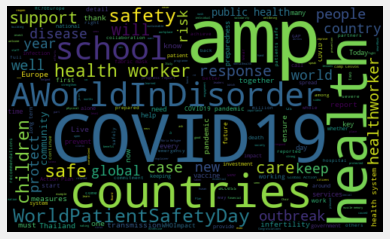

In [140]:
#visualisation in word cloud
alltweets = ' '.join([i for i in tweets_cleaned_df['tweets']])
wc = WordCloud(width=500,height=300,random_state=69,max_font_size=100).generate(alltweets)
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

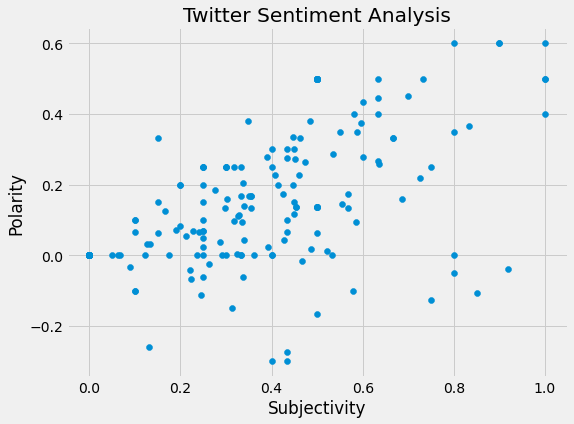

In [157]:
#analysis plot 
plt.figure(figsize=(8,6)) 
plt.scatter(tweets_cleaned_df["Subjectivity"],tweets_cleaned_df["Polarity"]) 
plt.title('Twitter Sentiment Analysis') 
plt.ylabel('Polarity') 
plt.xlabel('Subjectivity') 
plt.show()

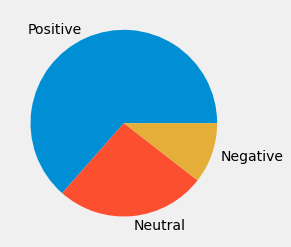

In [166]:
#Pie chart

labels = ["Positive","Neutral","Negative"]
values = list(tweets_cleaned_df['Sentiment'].value_counts())
plt.pie(values,labels=labels)
plt.show()